In [73]:
import pandas as pd
import numpy as np
import re
import operator
import matplotlib.pyplot as plt

In [3]:
borrowed_file = "/home/mbr/Financial_Attitudes_Clustering/Data/Raw/borrowed_money/borrowed_money.csv"

In [15]:
borrowed_data = pd.read_csv(borrowed_file)
borrowed_data.rename(columns = {'2011 [YR2011]': 2011, '2014 [YR2014]': 2014, '2017 [YR2017]': 2017, '2021 [YR2021]': 2021, '2022 [YR2022]': 2022}, inplace = True)
# drop data without country code (those are the description rows)
borrowed_data.dropna(subset = ['Country Code'], inplace = True)

In [17]:
# change strings to numeric values, use NaN wherever data not available
value_columns = [2011, 2014, 2017, 2021, 2022]
borrowed_data[value_columns] = borrowed_data[value_columns].apply(pd.to_numeric, errors = 'coerce')

# Missing data analysis

In [64]:
# the number of series in the data frame
series = borrowed_data["Series Code"].unique()
no_of_series = series.shape[0]

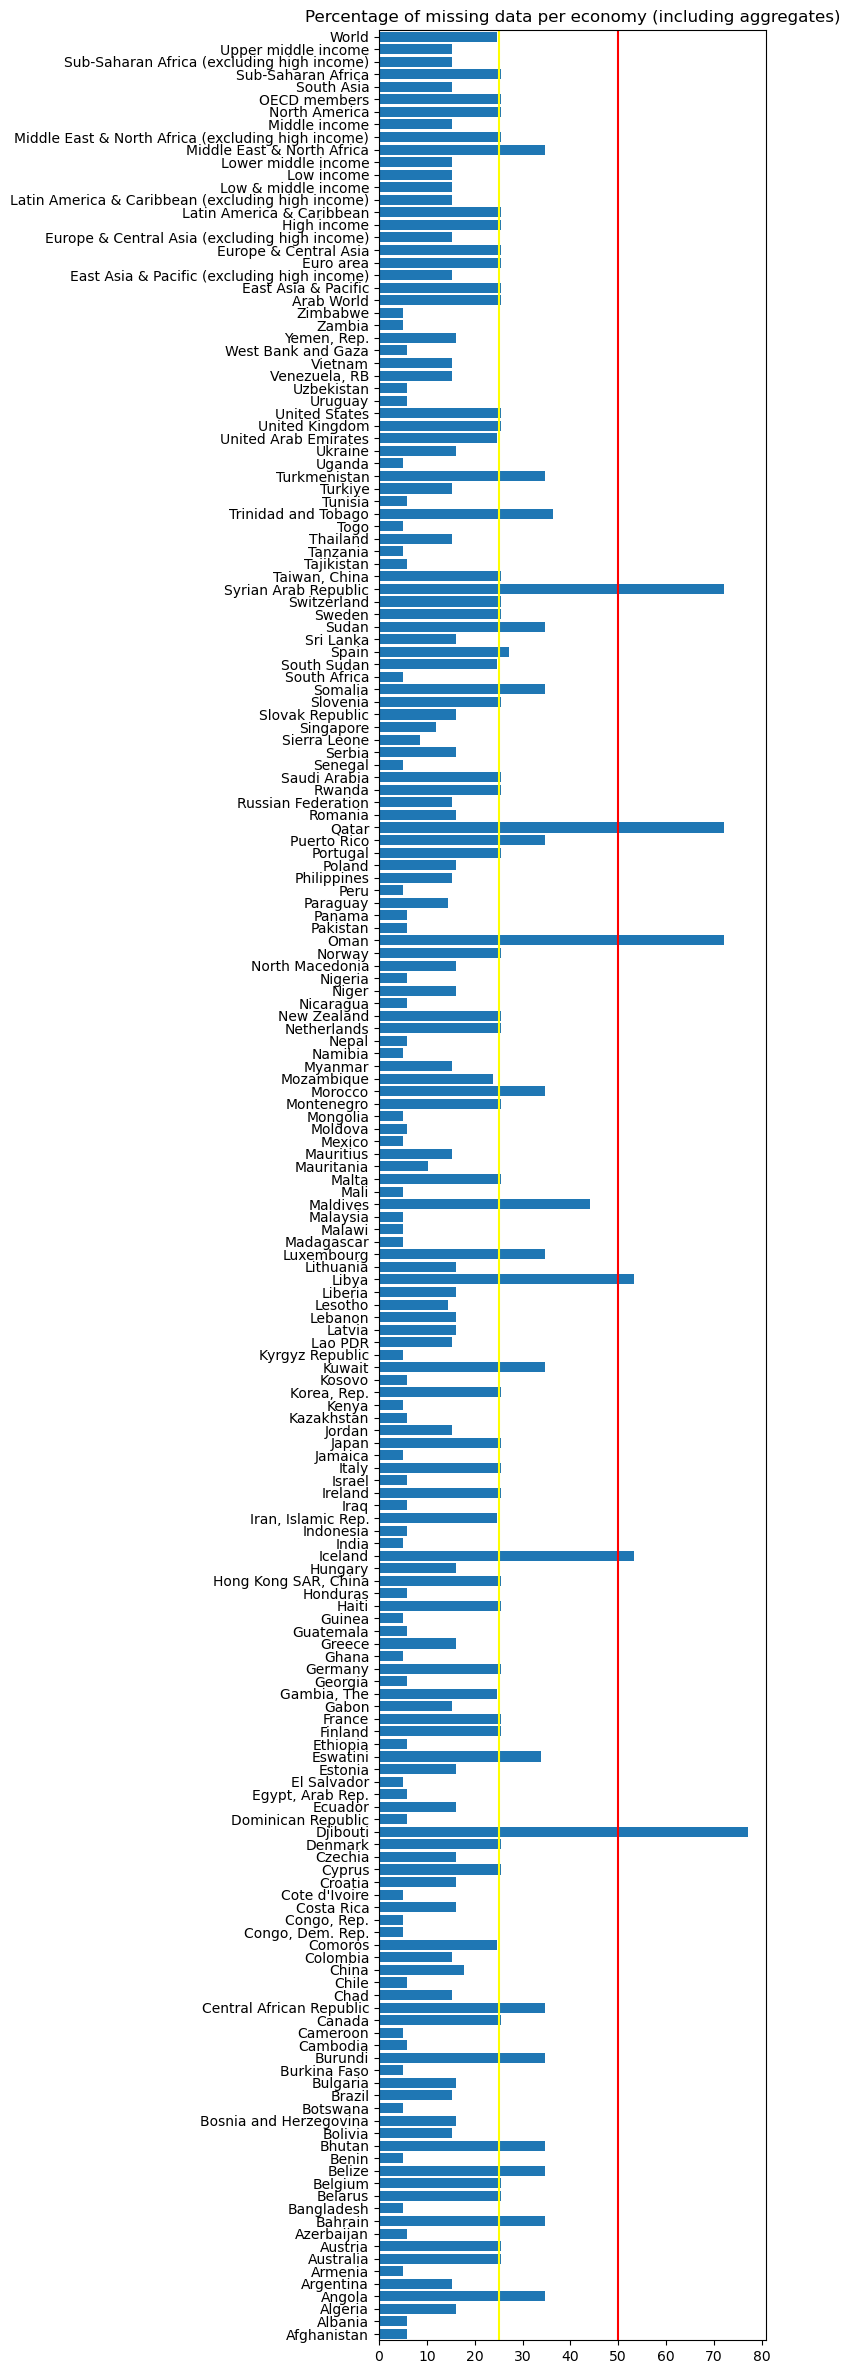

In [103]:
# codes of the countries in the database
# some of those are aggregates
codes = borrowed_data["Country Name"].unique()
mp = []
for code in codes:
    economy_borrowed_data = borrowed_data[borrowed_data["Country Name"] == code]
    # percentage of missing series per country
    missing_series_perc = economy_borrowed_data[value_columns].isna().all(axis = 1).sum()/no_of_series * 100
    mp.append(missing_series_perc)
    # 2) what percentage of series has only one value
    # 3) what percentage of series has two or more values
    #print(code, ":", np.round(missing_series_perc, 1))

# plot missing value percentage for codes
y_positions = np.arange(len(codes))

plt.figure(figsize = (5,30))
plt.ylim(-0.5, len(codes) - 0.5)
plt.barh(y_positions, np.array(mp))
plt.yticks(y_positions, codes)
plt.axvline(x = 50, color = 'red')
plt.axvline(x = 25, color = 'yellow')
plt.title("Percentage of missing data per economy (including aggregates)")
plt.show()

In [34]:
# rows with no data in the value columns, that is in the columns representing data from each wave
no_data_rows = borrowed_data[borrowed_data[value_columns].isna().all(axis = 1)]
no_data_rows["Series Name"].unique()

array(['Borrowed any money using a mobile money account (% age 15+)',
       'Borrowed for education or school fees, rural (% age 15+)',
       'Borrowed for education or school fees, urban (% age 15+)',
       'Borrowed from a store by buying on credit, rural (% age 15+)',
       'Borrowed from a store by buying on credit, urban (% age 15+)',
       'Borrowed to start, operate, or expand a farm or business, rural (% age 15+)',
       'Borrowed to start, operate, or expand a farm or business, urban (% age 15+)',
       'Borrowed any money from a formal financial institution or using a mobile money account, rural (% age 15+)',
       'Borrowed any money from a formal financial institution or using a mobile money account, urban (% age 15+)',
       'Borrowed any money, rural (% age 15+)',
       'Borrowed any money, urban (% age 15+)',
       'Borrowed for health or medical purposes, rural (% age 15+)',
       'Borrowed for health or medical purposes, urban (% age 15+)',
       'Borrowed

In [22]:
borrowed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21712 entries, 0 to 21711
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  21712 non-null  object 
 1   Country Code  21712 non-null  object 
 2   Series Name   21712 non-null  object 
 3   Series Code   21712 non-null  object 
 4   2011          5388 non-null   float64
 5   2014          12418 non-null  float64
 6   2017          10536 non-null  float64
 7   2021          9855 non-null   float64
 8   2022          1197 non-null   float64
dtypes: float64(5), object(4)
memory usage: 1.7+ MB
